# Plotting percentatge of mountain incidents acted by the fire departement

In [32]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

## Importing correlated incidents with fire departement actions

In [24]:
direct = 'C:/Users/Imma/Documents/1. Estudis/1. Master/1r semestre/Analisi_vis_Dades_massives/Projecte/AVDM_ioib/Imma/'

df = pd.read_csv(direct + 'Correlations_mountain.csv')
df['CODI_COMARCA'] = df['CODI_COMARCA'].astype(str).str.zfill(2)
df

,ANY-MES,COMARCA,INCIDENTS,CODI_COMARCA,SALVAMENTS
0,2018-01-01,ALT EMPORDA,821,02,2
1,2018-01-01,ALT PENEDES,605,03,2
2,2018-01-01,ANOIA,582,06,3
3,2018-01-01,BAGES,945,07,6
4,2018-01-01,BAIX EMPORDA,636,10,2
...,...,...,...,...,...
1864,2022-12-01,TARRAGONES,2293,36,1
1865,2022-12-01,TERRA ALTA,40,37,2
1866,2022-12-01,VAL D'ARAN,67,39,9
1867,2022-12-01,VALLES OCCIDENTAL,6226,40,5


In [25]:
def percentatge(x,y):
    p = x/y*100
    return p

data=df.copy()

data['PERCENTATGE'] = data.apply(lambda row: percentatge(row['SALVAMENTS'], row['INCIDENTS']), axis=1)

data

results= data[data['COMARCA']=='BERGUEDA']
results

,ANY-MES,COMARCA,INCIDENTS,CODI_COMARCA,SALVAMENTS,PERCENTATGE
30,2018-02-01,BERGUEDA,175,14,6,3.428571
54,2018-03-01,BERGUEDA,133,14,5,3.759398
84,2018-04-01,BERGUEDA,136,14,1,0.735294
115,2018-05-01,BERGUEDA,135,14,8,5.925926
144,2018-06-01,BERGUEDA,139,14,7,5.035971
176,2018-07-01,BERGUEDA,172,14,7,4.069767
207,2018-08-01,BERGUEDA,228,14,9,3.947368
243,2018-09-01,BERGUEDA,152,14,22,14.473684
274,2018-10-01,BERGUEDA,176,14,9,5.113636
309,2018-11-01,BERGUEDA,166,14,7,4.216867


In [26]:
aver_perc = data.copy()

aver_perc = pd.DataFrame(aver_perc.groupby(['COMARCA','CODI_COMARCA'])['PERCENTATGE'].apply(np.mean))


aver_perc= aver_perc.reset_index()
aver_perc

,COMARCA,CODI_COMARCA,PERCENTATGE
0,ALT CAMP,01,0.590444
1,ALT EMPORDA,02,0.466397
2,ALT PENEDES,03,0.370550
3,ALT URGELL,04,3.104360
4,ALTA RIBAGORÇA,05,17.141564
5,ANOIA,06,0.669160
6,BAGES,07,0.593721
7,BAIX CAMP,08,0.206668
8,BAIX EBRE,09,0.485939
9,BAIX EMPORDA,10,0.568833


## Importing map

In [28]:
data_dir= '../dades/'
cat = gpd.read_file(data_dir + "divisions-administratives-v2r1-comarques-100000-20220801.shx")
cat.rename(columns = {'NOMCOMAR':'COMARCA'}, inplace = True)
cat.rename(columns = {'CODICOMAR':'CODI_COMARCA'}, inplace = True)
cat

,CODI_COMARCA,COMARCA,CAPCOMAR,AREAC5000,geometry
0,01,Alt Camp,Valls,537.6317,"POLYGON ((373635.755 4592021.079, 373669.333 4..."
1,02,Alt Empordà,Figueres,1356.6431,"MULTIPOLYGON (((514495.140 4662167.740, 514492..."
2,03,Alt Penedès,Vilafranca del Penedès,592.5498,"POLYGON ((385914.163 4595999.962, 386085.364 4..."
3,04,Alt Urgell,la Seu d'Urgell,1447.2028,"MULTIPOLYGON (((360736.000 4649167.000, 360624..."
4,05,Alta Ribagorça,el Pont de Suert,427.2234,"POLYGON ((326572.730 4721574.001, 326622.339 4..."
5,06,Anoia,Igualada,867.0471,"POLYGON ((370158.839 4628885.052, 370282.509 4..."
6,07,Bages,Manresa,1092.7982,"POLYGON ((417259.067 4646530.811, 417513.903 4..."
7,08,Baix Camp,Reus,696.4883,"MULTIPOLYGON (((335052.970 4547018.980, 335051..."
8,09,Baix Ebre,Tortosa,1001.9306,"MULTIPOLYGON (((311847.200 4514855.880, 311833..."
9,10,Baix Empordà,la Bisbal d'Empordà,701.1353,"MULTIPOLYGON (((497966.430 4622427.830, 497965..."


## Merging map and data and plotting

In [35]:
data_merged =pd.merge(cat, aver_perc, on=['CODI_COMARCA'])
data_merged.head()

,CODI_COMARCA,COMARCA_x,CAPCOMAR,AREAC5000,geometry,COMARCA_y,PERCENTATGE
0,01,Alt Camp,Valls,537.6317,"POLYGON ((373635.755 4592021.079, 373669.333 4...",ALT CAMP,0.590444
1,02,Alt Empordà,Figueres,1356.6431,"MULTIPOLYGON (((514495.140 4662167.740, 514492...",ALT EMPORDA,0.466397
2,03,Alt Penedès,Vilafranca del Penedès,592.5498,"POLYGON ((385914.163 4595999.962, 386085.364 4...",ALT PENEDES,0.370550
3,04,Alt Urgell,la Seu d'Urgell,1447.2028,"MULTIPOLYGON (((360736.000 4649167.000, 360624...",ALT URGELL,3.104360
4,05,Alta Ribagorça,el Pont de Suert,427.2234,"POLYGON ((326572.730 4721574.001, 326622.339 4...",ALTA RIBAGORÇA,17.141564


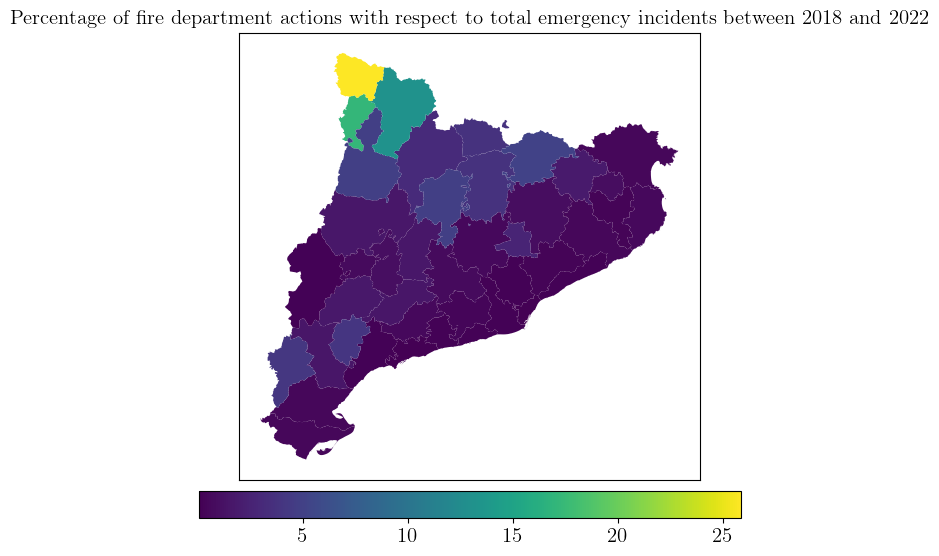

In [38]:
#highlight the counties with most rescue actions
# colors = {"Baix Llobregat":'darkorange',
#           "Vallès Occidental":'cornflowerblue',
#           "Val d'Aran":'mediumorchid',
#           "Ripollès":'royalblue',
#           "Berguedà":'darkred'}

fig, ax = plt.subplots(1,1,figsize=(7,7))
ax.set_xticks([])
ax.set_yticks([])
plt.rc('text', usetex = True)
plt.rc('font', family='serif')
data_merged.plot(column = 'PERCENTATGE',
                                  ax=ax,
                                  legend=True,
                                  cmap='viridis',
                                  legend_kwds={'orientation': "horizontal", 'pad': 0.02})
merged_rescue_tot_gpd = data_merged.set_index("COMARCA_x")
#merged_rescue_tot_gpd.loc[list(colors.keys()),:].boundary.plot(ax=ax,color=list(colors.values()))
merged_rescue_tot_gpd = merged_rescue_tot_gpd.reset_index()
cb_ax = fig.axes[1] 
cb_ax.tick_params(labelsize=15)
ax.set_title(r'Percentage of fire department actions with respect to total emergency incidents between 2018 and 2022', fontsize = 15)
#plt.savefig('figures/total_num_2018_2022.pdf')
plt.show()